Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib
%matplotlib inline

Data connection and processing

In [2]:
loan_dataset=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset.shape

(614, 13)

In [6]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

Missaing values handiling

continuous value replace with mean

In [9]:
loan_dataset['Loan_Amount_Term']=loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mean())
loan_dataset['LoanAmount']=loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())
loan_dataset['Credit_History']=loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mean())

Categorical value repleace mode

In [10]:
loan_dataset['Gender']=loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0])
loan_dataset['Married']=loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0])
loan_dataset['Dependents']=loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0])
loan_dataset['Self_Employed']=loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0])

In [11]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


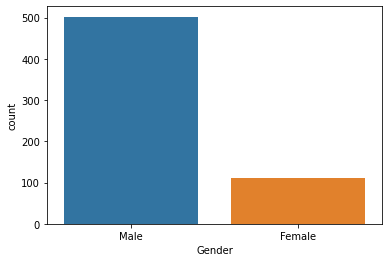

In [12]:
sns.countplot(loan_dataset['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


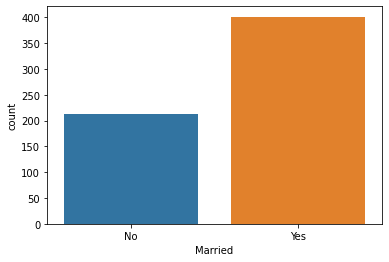

In [13]:
sns.countplot(loan_dataset['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


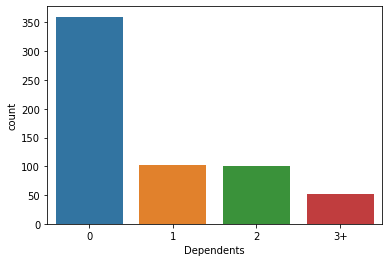

In [14]:
sns.countplot(loan_dataset['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


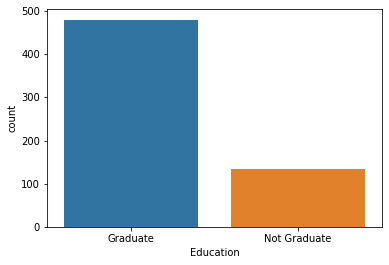

In [15]:
sns.countplot(loan_dataset['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


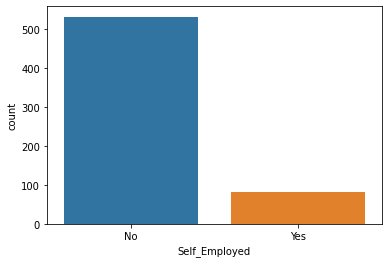

In [16]:
sns.countplot(loan_dataset['Self_Employed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


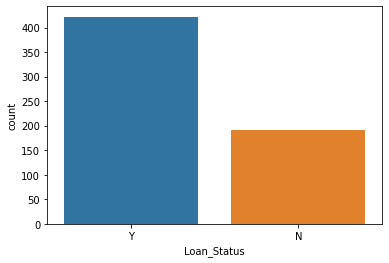

In [17]:
sns.countplot(loan_dataset['Loan_Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


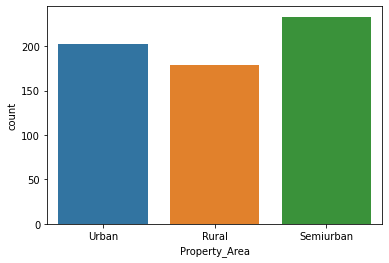

In [18]:
sns.countplot(loan_dataset['Property_Area'])

Create a new attribute Total_income

In [19]:
## create new attribute
loan_dataset['Total_Income']=loan_dataset['ApplicantIncome'] + loan_dataset['CoapplicantIncome']

In [20]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


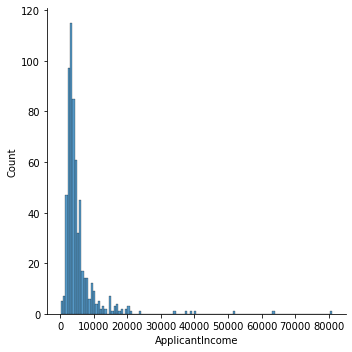

In [21]:
sns.displot(loan_dataset['ApplicantIncome'])

ApplicationIncome data visualization is not good. FOR Better visulazition use log function.

In [22]:
loan_dataset['ApplicantIncomeLog']=np.log(loan_dataset['ApplicantIncome'])

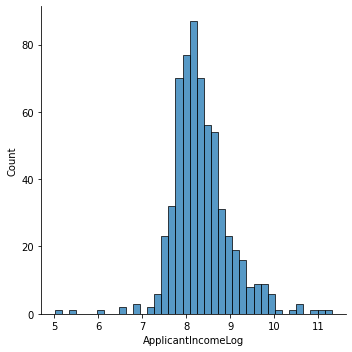

In [23]:
sns.displot(loan_dataset['ApplicantIncomeLog'])

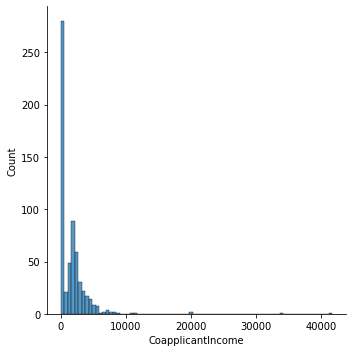

In [24]:
sns.displot(loan_dataset['CoapplicantIncome'])

CoapplicantIncomeLog data visualization is not good. Better visulazition use log function.**bold text**

In [25]:
loan_dataset['CoapplicantIncomeLog']=np.log(loan_dataset['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


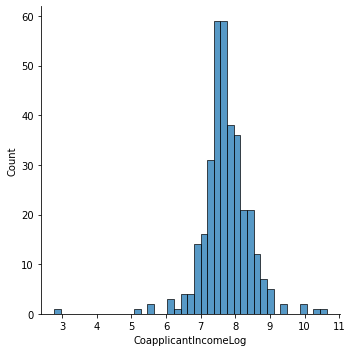

In [26]:
sns.displot(loan_dataset['CoapplicantIncomeLog'])

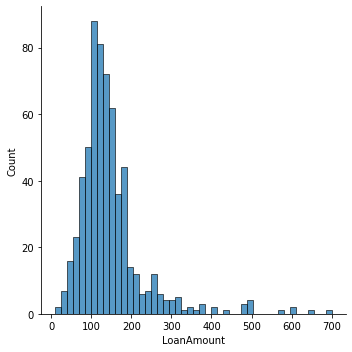

In [27]:
sns.displot(loan_dataset['LoanAmount'])

LoanAmount data visualization is not good. Better visulazition use log function

In [28]:
loan_dataset['LoanAmountLog']=np.log(loan_dataset['LoanAmount'])

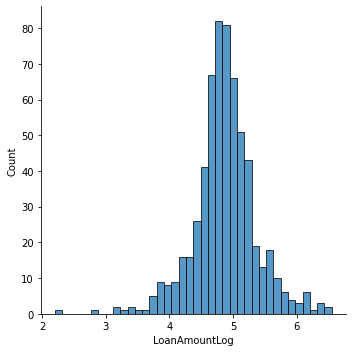

In [29]:
sns.displot(loan_dataset['LoanAmountLog'])

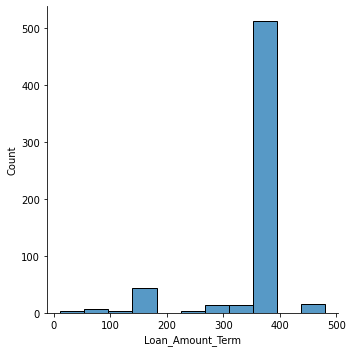

In [30]:
sns.displot(loan_dataset['Loan_Amount_Term'])

for Loan_Amount_Term use log function

In [31]:
loan_dataset['Loan_Amount_Term_Log']=np.log(loan_dataset['Loan_Amount_Term'])

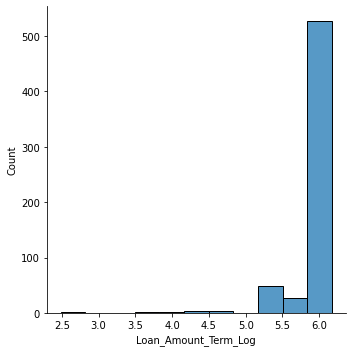

In [32]:
sns.displot(loan_dataset['Loan_Amount_Term_Log'])

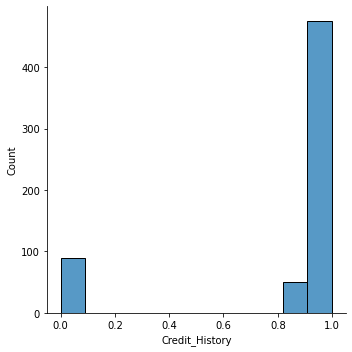

In [33]:
sns.displot(loan_dataset['Credit_History'])

Create of new attribure

In [34]:
loan_dataset['Total_Income_Log']=np.log(loan_dataset['Total_Income'])

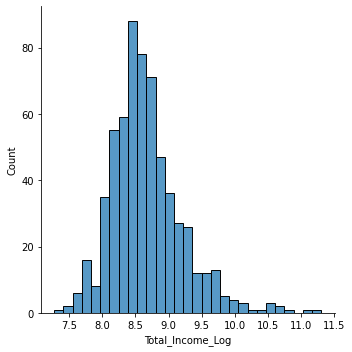

In [35]:
sns.displot(loan_dataset['Total_Income_Log'])

Cooretation Matrix

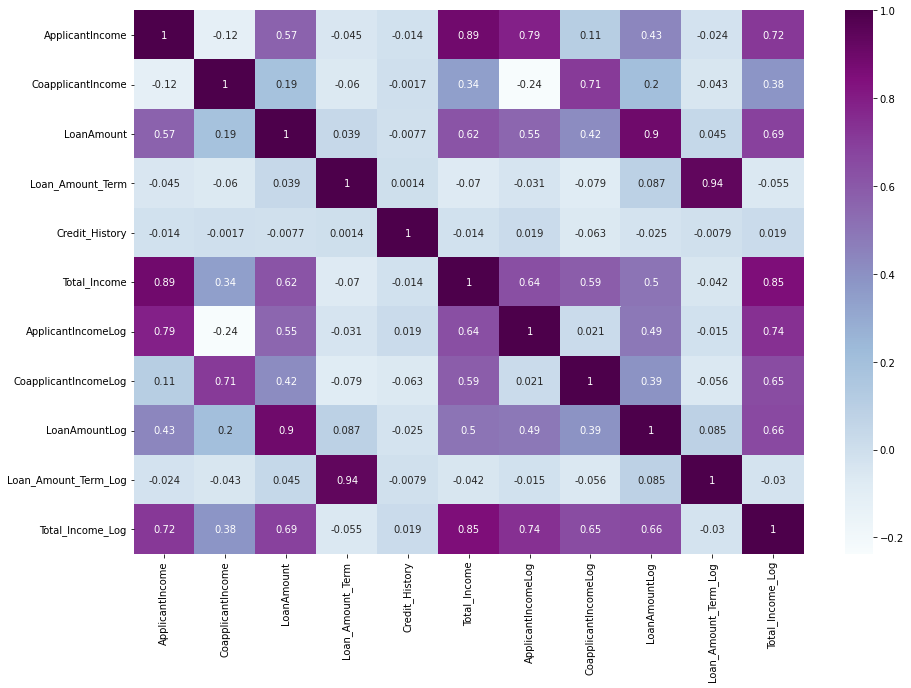

In [36]:
corr=loan_dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True,cmap="BuPu")

Remove unnesessary columns

In [37]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


drop unnesessary columns

In [38]:
#drop unnesessary columns
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
loan_dataset=loan_dataset.drop(columns=cols, axis=1)




In [39]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le=LabelEncoder()
for col in cols:
  loan_dataset[col]=le.fit_transform(loan_dataset[col])


In [41]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


Train-Test split

In [42]:
X = loan_dataset.drop(columns=["Loan_Status"], axis=1)
y = loan_dataset["Loan_Status"]

In [43]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

Model Training

In [44]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
def classify(model,x,y):
  X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
  model.fit(X_train,y_train)
  print("Accuracy is", model.score(x_test,y_test)*100)
 
  y_predict=model.predict(x_test)
  print('confusion martrix is:',confusion_matrix(y_test,y_predict))
  sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
  print('calssification report is',classification_report(y_test,y_predict))
  
  #cross validation
  
  score=cross_val_score(model,x,y,cv=5)
  print('Cross validation is', np.mean(score)*100)

Classification

Accuracy is 79.22077922077922
confusion martrix is: [[ 19  30]
 [  2 103]]
calssification report is               precision    recall  f1-score   support

           0       0.90      0.39      0.54        49
           1       0.77      0.98      0.87       105

    accuracy                           0.79       154
   macro avg       0.84      0.68      0.70       154
weighted avg       0.82      0.79      0.76       154

Cross validation is 80.9462881514061


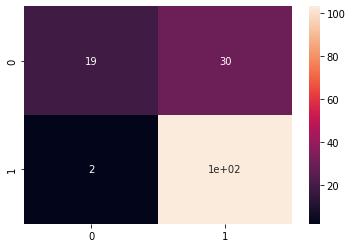

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)

Accuracy is 71.42857142857143
confusion martrix is: [[26 23]
 [21 84]]
calssification report is               precision    recall  f1-score   support

           0       0.55      0.53      0.54        49
           1       0.79      0.80      0.79       105

    accuracy                           0.71       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Cross validation is 71.182193789151


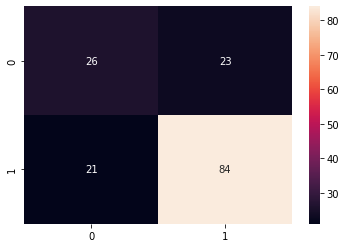

In [46]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 77.92207792207793
confusion martrix is: [[22 27]
 [ 7 98]]
calssification report is               precision    recall  f1-score   support

           0       0.76      0.45      0.56        49
           1       0.78      0.93      0.85       105

    accuracy                           0.78       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.78      0.78      0.76       154

Cross validation is 78.82713581234174


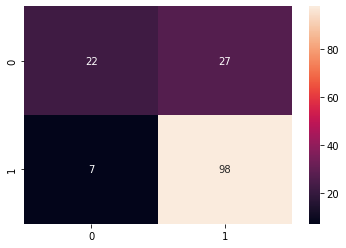

In [47]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy is 74.67532467532467
confusion martrix is: [[23 26]
 [13 92]]
calssification report is               precision    recall  f1-score   support

           0       0.64      0.47      0.54        49
           1       0.78      0.88      0.83       105

    accuracy                           0.75       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.73      0.75      0.73       154

Cross validation is 77.52898840463814


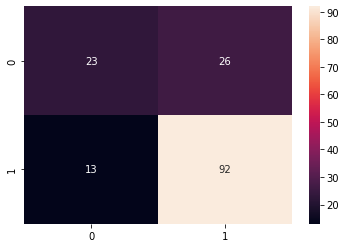

In [48]:
model=ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 78.57142857142857
confusion martrix is: [[ 19  30]
 [  3 102]]
calssification report is               precision    recall  f1-score   support

           0       0.86      0.39      0.54        49
           1       0.77      0.97      0.86       105

    accuracy                           0.79       154
   macro avg       0.82      0.68      0.70       154
weighted avg       0.80      0.79      0.76       154

Cross validation is 79.31627349060376


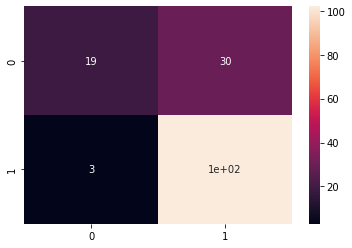

In [49]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classify(model,X,y)

Above this model i see RanmodForestClassifier provide best accuracy is 80.51.